In [1]:
"""
iş problemi 
Amazon üzerinden satışlarını gerçekleştiren ev tekstili ve günlük giyim odaklı üretimler yapan Kozmos,
ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını
artırmayı hedeflemektedir. Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlenecek ve
etiketlenen veri ile sınıflandırma modeli oluşturulacaktır

Veri seti hikayesi:
Star: Ürüne verilen yıldız sayısı
HelpFul: Yorumu faydalı bulan kişi sayısı
Title: Yorum içeriğine verilen başlık, kısa yorum 
Review:Ürüne yapılan yorum   


"""

'\niş problemi \n Amazon üzerinden satışlarını gerçekleştiren ev tekstili ve günlük giyim odaklı üretimler yapan Kozmos,\n ürünlerine gelen yorumları analiz ederek ve aldığı şikayetlere göre özelliklerini geliştirerek satışlarını\n artırmayı hedeflemektedir. Bu hedef doğrultusunda yorumlara duygu analizi yapılarak etiketlenecek ve\n etiketlenen veri ile sınıflandırma modeli oluşturulacaktır\n\nVeri seti hikayesi:\nStar: Ürüne verilen yıldız sayısı\nHelpFul: Yorumu faydalı bulan kişi sayısı\nTitle: Yorum içeriğine verilen başlık, kısa yorum \nReview:Ürüne yapılan yorum   \n\n\n'

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from textblob import Word,TextBlob
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer



In [9]:
# Metin ön işleme
df=pd.read_excel(r"C:\Users\onur eren ejderü\Desktop\pyhton\NLP\amazon.xlsx")
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


(   Star  HelpFul                                          Title  \
 0     5        0                                    looks great   
 1     5        0  Pattern did not align between the two panels.   
 2     5        0               Imagery is stretched. Still fun.   
 3     5        0                 Que se ven elegantes muy finas   
 4     5        0                             Wow great purchase   
 
                                               Review  
 0                                      Happy with it  
 1  Good quality material however the panels are m...  
 2  Product was fun for bedroom windows.<br />Imag...  
 3   Lo unico que me gustaria es que sean un poco ...  
 4  Great bang for the buck I can't believe the qu...  ,
 None)

In [20]:
# temizleme işlemleri 

# Metinleri küçük harflere çevirme
df["Review"] = df["Review"].str.lower()

# Noktalama işaretlerini kaldırma
df["Review"] = df["Review"].str.replace(r"[^\w\s]", "", regex=True)

# Sayıları kaldırma
df["Review"] = df["Review"].str.replace(r"\d", "", regex=True)

In [68]:
#anlam taşımayan ifadeleri kaldırma

sw=stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
df["Review"]=df["Review"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))
#sw içindeki kelimeler yoksa al ve birleştir

In [28]:
# veri setinde az frekans olan kelimeleri kaldırma
sil=pd.Series(" ".join(df["Review"]).split()).value_counts()[-1000:] #kelimeleri tek tek ayırma ve kaç kez geçtiğini bulma son 1000 değer
df["Review"]=df["Review"].apply(lambda x:" ".join(x for x in x.split() if x not in sil))


In [30]:
#lemmatization: kelimeleri köklerine ayırma
df["Review"]=df["Review"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df["Review"].head()

0                                                happy
1       good quality material however panel mismatched
2    product fun bedroom windowsbr imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck cant believe quality material ...
Name: Review, dtype: object

C:\Users\onur eren ejderü\AppData\Local\Temp\ipykernel_1308\677936145.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf=df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index() #frekansı bulma
C:\Users\onur eren ejderü\AppData\Local\Temp\ipykernel_1308\677936145.py:4: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf=df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index() #frekansı bulma
C:\Users\onur eren ejderü\AppData\Local\Temp\ipykernel_1308\677936145.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf=df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index() #frekansı bulma
C:\Users\onur eren ejderü\AppData

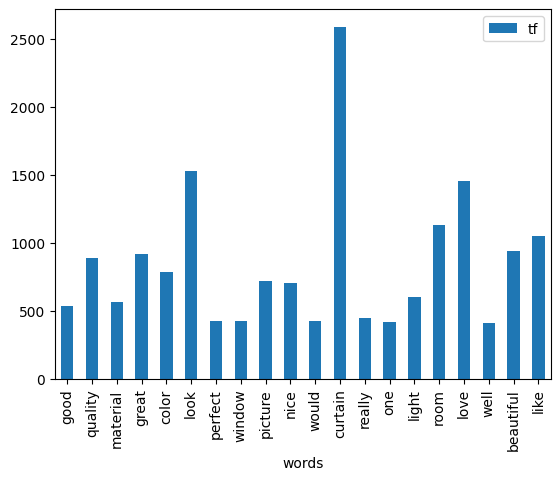

In [32]:
#metin görselleştirme

#barplot
tf=df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index() #frekansı bulma
tf.columns=["words","tf"]  #kolon ismi güncelleme
tf[tf["tf"]>360].plot.bar(x="words",y="tf") #frekansı 360'tan büyük olanlar
plt.show()


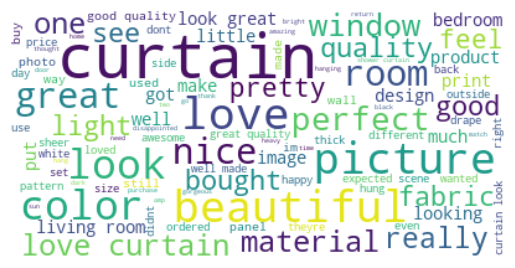

In [38]:
#wordcloud oluşturma
# wordcloud oluşturma
text = " ".join(i for i in df.Review)  # metinleri tek bir satırda topla

# WordCloud sınıfını kullanarak kelime bulutu oluşturma
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Kelime bulutunu görselleştirme
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # eksenleri kapatma
plt.show()

In [43]:
#duygu analizi

#gözetimsiz öğrenmeyi gözetimli öğrenmeye çevirmek için label oluşturma 
sia=SentimentIntensityAnalyzer()

df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)) #negatif mi pozitif mi skor döndürücek



0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...
2    {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [53]:
df["Review"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"]) #sadece compound değerini getir 
#-1,1 arası değer döner 0'dan büyükse pozitif değilse negatif


#veriye label atma
df["Review"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

df["Sentitment_Label"]=df["Review"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg") #yeni kolon oluşturma
df.groupby("Sentitment_Label")["Star"].mean()  #puanların ortalaması



Sentitment_Label
neg    3.390791
pos    4.586692
Name: Star, dtype: float64

In [67]:
df["Sentitment_Label"].head(8)

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
Name: Sentitment_Label, dtype: object

In [59]:
#makine öğrenmesi
train_x,test_x,train_y,test_y=train_test_split(df["Review"],df["Sentitment_Label"],test_size=0.36,random_state=42)


#TF-IDF kelime bazında hesaplama
tf_idf_word_vectorizer=TfidfVectorizer().fit(train_x) #train_x ile öğrenecek vektörleşecek
x_train_tf__idf_word=tf_idf_word_vectorizer.transform(train_x)  #öğrenilen yapıyı dönüştür
x_test_tf__idf_word=tf_idf_word_vectorizer.transform(test_x)
 

In [60]:
#modelleme 
log_model=LogisticRegression().fit(x_train_tf__idf_word,train_y)  
y_pred=log_model.predict(x_test_tf__idf_word) #test verisinin vektörleşmiş halinden predict etme

In [61]:
classification_report(y_pred,test_y)

'              precision    recall  f1-score   support\n\n         neg       0.30      0.92      0.45        98\n         pos       1.00      0.89      0.94      1922\n\n    accuracy                           0.89      2020\n   macro avg       0.65      0.90      0.70      2020\nweighted avg       0.96      0.89      0.92      2020\n'

In [62]:
cross_val_score(log_model,x_test_tf__idf_word,test_y,cv=5).mean()

0.8693069306930692

In [64]:
#rastgele yorum alarak tahmin etme
random_review=pd.Series(df["Review"].sample(1).values) 
new_review=CountVectorizer().fit(train_x).transform(random_review)  #vektörleştirme
pred=log_model.predict(new_review)  #modele tahmin yaptırma
pred

array(['pos'], dtype=object)

In [65]:

rf_model=RandomForestClassifier().fit(x_train_tf__idf_word,train_y)
cross_val_score(rf_model,x_test_tf__idf_word,test_y,cv=5).mean()

0.9029702970297029